# Principal Components Analysis

In [17]:
#Load dependencies
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
#from wpca import PCA
from sklearn.decomposition import PCA as sklearnPCA
import seaborn

In [18]:
#Load movie names and movie ratings
movies=pd.read_csv('movies.csv')
ratings =pd.read_csv('ratings.csv')
ratings.drop(['timestamp'], axis=1, inplace=True)

def replace_name(x):
    return movies[movies['movieId']==x].title.values[0]
ratings.movieId = ratings.movieId.map(replace_name)

M = ratings.pivot_table(index=['userId'], columns=['movieId'], values='rating')
m = M.shape
m

df1 = M.replace(np.nan, 0, regex=True)
X_std = StandardScaler().fit_transform(df1)

In [20]:
#Create a covariance matrix
mean_vec = np.mean(X_std, axis=0)
cov_mat = (X_std - mean_vec).T.dot((X_std - mean_vec)) / (X_std.shape[0]-1)
print('Covariance matrix \n%s' %cov_mat)

#Create the same covariance matrix with 1 line of code
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

Covariance matrix 
[[ 1.0013947  -0.00276421 -0.00195661 ... -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ... -0.00612653 -0.0022929
  -0.00753398]
 ...
 [-0.00858289  0.14004611 -0.00612653 ...  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...  0.14005644  0.01676203
   1.0013947 ]]
NumPy covariance matrix: 
[[ 1.0013947  -0.00276421 -0.00195661 ... -0.00858289 -0.00321221
  -0.01055463]
 [-0.00276421  1.0013947  -0.00197311 ...  0.14004611 -0.0032393
  -0.01064364]
 [-0.00195661 -0.00197311  1.0013947  ... -0.00612653 -0.0022929
  -0.00753398]
 ...
 [-0.00858289  0.14004611 -0.00612653 ...  1.0013947   0.02888777
   0.14005644]
 [-0.00321221 -0.0032393  -0.0022929  ...  0.02888777  1.0013947
   0.01676203]
 [-0.01055463 -0.01064364 -0.00753398 ...  0.14005644  0.01

In [21]:
#Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-1.34830861e-04+0.00000000e+00j  5.76715196e-04+0.00000000e+00j
   4.83014783e-05+0.00000000e+00j ...  7.23776807e-10+3.94677270e-10j
   7.23776807e-10-3.94677270e-10j -1.33207370e-09+0.00000000e+00j]
 [ 5.61303451e-04+0.00000000e+00j -1.11493526e-02+0.00000000e+00j
   8.85798170e-03+0.00000000e+00j ...  4.79413907e-11+9.97352377e-12j
   4.79413907e-11-9.97352377e-12j -1.07293578e-10+0.00000000e+00j]
 [ 4.58686517e-04+0.00000000e+00j -2.39083484e-03+0.00000000e+00j
   6.58309436e-04+0.00000000e+00j ... -7.21781761e-11-3.71756473e-11j
  -7.21781761e-11+3.71756473e-11j  1.45982546e-10+0.00000000e+00j]
 ...
 [ 5.22202072e-03+0.00000000e+00j -5.49944367e-03+0.00000000e+00j
   5.16164779e-03+0.00000000e+00j ... -9.92971964e-09+5.58471323e-09j
  -9.92971964e-09-5.58471323e-09j  3.43061392e-09+0.00000000e+00j]
 [ 8.97514078e-04+0.00000000e+00j -1.14918748e-02+0.00000000e+00j
   9.41277803e-03+0.00000000e+00j ...  2.39506817e-08+1.32296915e-08j
   2.39506817e-08-1.32296915e-08j

In [24]:
pca = sklearnPCA(n_components=2)
pca.fit_transform(df1)
print (pca.explained_variance_ratio_) 

[0.13379809 0.03977444]


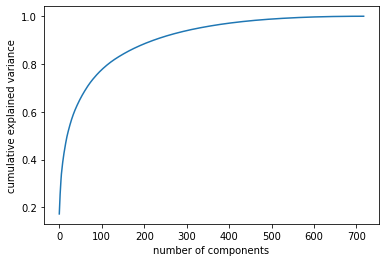

In [25]:
#Explained variance
pca = sklearnPCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

# Independent component analysis (ICA)

In [1]:
import numpy as np
np.random.seed(0)
from scipy import signal
from scipy.io import wavfile
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

In /home/javanmardis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/javanmardis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/javanmardis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /home/javanmardis/.local/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/javanmardis/.local/lib/python3.6/site-packa

In [2]:
def center(X):
    X = np.array(X)
    
    mean = X.mean(axis=1, keepdims=True)
    
    return X- mean

In [5]:
def g(x):
    return np.tanh(x)
def g_der(x):
    return 1 - g(x) * g(x)

In [25]:
def whitening(X):
    cov = np.cov(X)
    d, E = np.linalg.eigh(cov)
    D = np.diag(d)
    D_inv = np.sqrt(np.linalg.inv(D))
    X_whiten = np.dot(E, np.dot(D_inv, np.dot(E.T, X)))
    return X_whiten

In [26]:
def calculate_new_w(w, X):
    w_new = (X * g(np.dot(w.T, X))).mean(axis=1) - g_der(np.dot(w.T, X)).mean() * w
    w_new /= np.sqrt((w_new ** 2).sum())
    return w_new

In [11]:
def ica(X, iterations, tolerance=1e-5):
    X = center(X)
    
    X = whitening(X)
        
    components_nr = X.shape[0]

    W = np.zeros((components_nr, components_nr), dtype=X.dtype)

    for i in range(components_nr):
        
        w = np.random.rand(components_nr)
        
        for j in range(iterations):
            
            w_new = calculate_new_w(w, X)
            ut
            if i >= 1:
                w_new -= np.dot(np.dot(w_new, W[:i].T), W[:i])
            
            distance = np.abs(np.abs((w * w_new).sum()) - 1)
            
            w = w_new
            
            if distance < tolerance:
                break
                
        W[i, :] = w
        
    S = np.dot(W, X)
    
    return S

In [13]:

def plot_mixture_sources_predictions(X, original_sources, S):
    fig = plt.figure()

    plt.subplot(3, 1, 1)
    for x in X:
        plt.plot(x)
    plt.title("mixtures")

    plt.subplot(3, 1, 2)
    for s in original_sources:
        plt.plot(s)
    plt.title("real sources")

    plt.subplot(3,1,3)
    for s in S:
        plt.plot(s)
    plt.title("predicted sources")
    
    fig.tight_layout()
    plt.show()

In [16]:
def mix_sources(mixtures, apply_noise=False):
    for i in range(len(mixtures)):
        
        max_val = np.max(mixtures[i])
        
        if max_val > 1 or np.min(mixtures[i]) < 1:
            
            mixtures[i] = mixtures[i] / (max_val / 2) - 0.5
            
    X = np.c_[[mix for mix in mixtures]]
    
    if apply_noise:
        
        X += 0.02 * np.random.normal(size=X.shape)
        
    return X

In [17]:
n_samples = 2000
time = np.linspace(0, 8, n_samples)
s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time)) # square signal
s3 = signal.sawtooth(2 * np.pi * time)

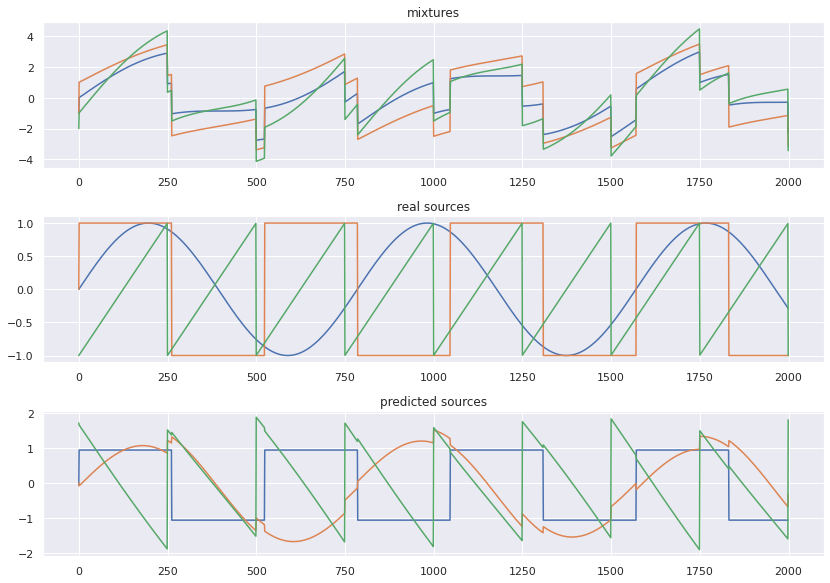

In [18]:
X = np.c_[s1, s2, s3]
A = np.array(([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]]))
X = np.dot(X, A.T)
X = X.T
S = ica(X, iterations=1000)
actual = mix_sources([s1,s2,s3])
plot_mixture_sources_predictions(X, [s1, s2, s3], S)

# Fast ICA in Scikit Learn

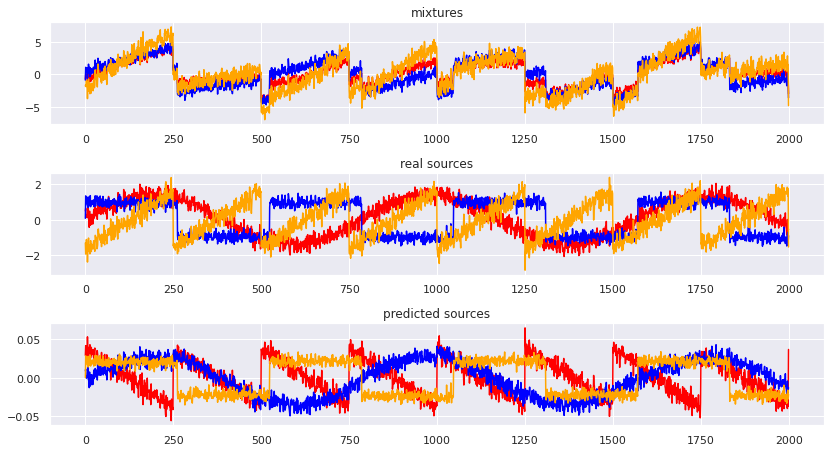

In [20]:

from sklearn.decomposition import FastICA

np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

s1 = np.sin(2 * time)
s2 = np.sign(np.sin(3 * time))
s3 = signal.sawtooth(2 * np.pi * time)

S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape)
S /= S.std(axis=0)
A = np.array([[1, 1, 1], [0.5, 2, 1.0], [1.5, 1.0, 2.0]])
X = np.dot(S, A.T)

ica = FastICA(n_components=3)
S_ = ica.fit_transform(X)

fig = plt.figure()

models = [X, S, S_]

names = ['mixtures', 'real sources', 'predicted sources']

colors = ['red', 'blue', 'orange']

for i, (name, model) in enumerate(zip(names, models)):
    plt.subplot(4, 1, i+1)
    plt.title(name)
    for sig, color in zip (model.T, colors):
        plt.plot(sig, color=color)
        
fig.tight_layout()        
plt.show()